#  Cahn-Hilliard Euler Algorithm

## Spinodal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

# Parameters
M = 0.1  
a = 0.1  
k = 0.1  
delta_x = 1  # Spatial discretization step
delta_t = 2  # Temporal discretization step
grid_size = 100  # Size of the square lattice

phi_0 = 0.5 #Spinoidal or Bubbles

# Initialize order parameter phi
phi = phi_0 + (np.random.rand(grid_size, grid_size) - 0.5) * 0.2

free_energy = [] #Store free energies

# Function to compute chemical potential
def compute_mu(phi):
    laplacian_phi = (
        np.roll(phi, 1, axis=0)
        + np.roll(phi, -1, axis=0)
        + np.roll(phi, 1, axis=1)
        + np.roll(phi, -1, axis=1)
        - 4 * phi
    )
    return -a * phi + a * phi ** 3 - (k * laplacian_phi / (delta_x ** 2)), laplacian_phi

# Update function for animation
def update(frame):
    sweeps=1000 #Number of iterations per sweep
    global phi
    for i in range(sweeps):
        # Calculate potential mu
        mu, laplacian_phi = compute_mu(phi)

        # Calculate new phi
        phi += (
            M
            * delta_t
            * (
                np.roll(mu, 1, axis=0)
                + np.roll(mu, -1, axis=0)
                + np.roll(mu, 1, axis=1)
                + np.roll(mu, -1, axis=1)
                - 4 * mu
            )
            / (delta_x ** 2)
        )

    # Update the image every 100 frames
    im.set_array(phi)
    ax.set_title(f"Step {frame*sweeps}")

    free_energy.append(
        -a / 2 * (phi ** 2)
        + a / 4 * (phi ** 4)
        + (k / 2 * ((delta_x ** 2)))
        * ((
                ((np.roll(phi, 1, axis=0) - np.roll(phi, -1, axis=0)) / 2) ** 2
                + ((np.roll(phi, 1, axis=1) - np.roll(phi, -1, axis=1)) / 2) ** 2
            )))
    
    if frame == 500:
        ani.event_source.stop()  # Stop the animation
        np.savetxt(f'free_energy_{phi_0}.txt', (np.sum(free_energy, axis=(1, 2))))
    return im,

# Create initial plot
fig, ax = plt.subplots()
im = ax.imshow(phi, cmap="seismic", interpolation="nearest", vmin=-1, vmax=1)
plt.colorbar(im)

# Create animation
ani = FuncAnimation(fig, update, frames=1000, interval=50, repeat=False)
plt.show()


<IPython.core.display.Javascript object>

C:\Users\05pat\anaconda3\envs\sia-2024-astro\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


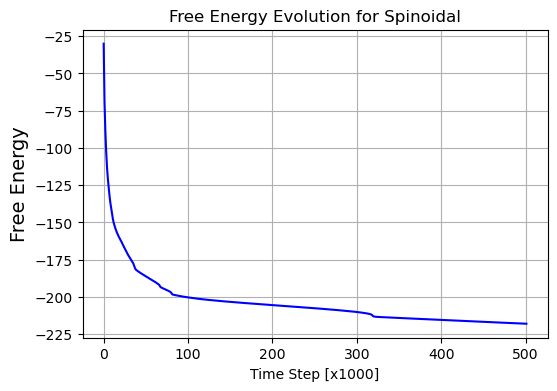

In [13]:
%matplotlib inline

free_energy=np.loadtxt("free_energy_0.txt")

x = np.arange(0, len(free_energy))
plt.figure(figsize=(6, 4))
plt.plot(x, free_energy, color='blue')
plt.xlabel('Time Step [x1000]')
plt.ylabel('Free Energy', fontsize=14)
plt.title(f'Free Energy Evolution for Spinoidal')
plt.grid(True)
plt.show()

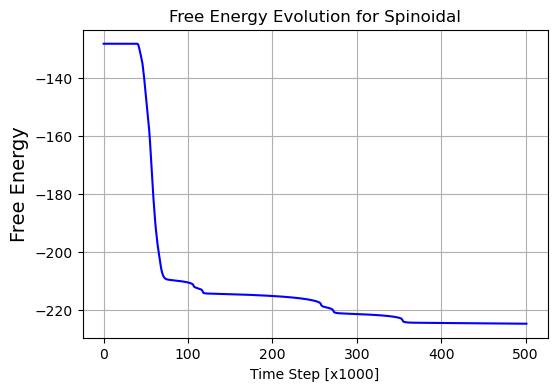

In [14]:
%matplotlib inline
free_energy=np.loadtxt("free_energy_0.5.txt")

x = np.arange(0, len(free_energy))
plt.figure(figsize=(6, 4))
plt.plot(x, free_energy, color='blue')
plt.xlabel('Time Step [x1000]')
plt.ylabel('Free Energy', fontsize=14)
plt.title(f'Free Energy Evolution for Spinoidal')
plt.grid(True)
plt.show()

# Poisson Equation

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


def jacobi_iteration(phi, rho, epsilon=1):
    error_threshold = 1e-3  # Set desired error threshold
    error = 1
    iterations = 0
    while error > error_threshold: #Run algorithm 
        phi_new = (
            np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
            np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) +
            np.roll(phi, 1, axis=2) + np.roll(phi, -1, axis=2) +
            rho
        ) / 6

        # Define boundary values (Dirichlet boundary conditions)
        phi_new[0, :, :] = 0  
        phi_new[-1, :, :] = 0 
        phi_new[:, 0, :] = 0  
        phi_new[:, -1, :] = 0  
        
        #Magnetic Boundry Conditions are removed.
        #phi_new[:, :, 0] = 0  
        #phi_new[:, :, -1] = 0  

        # Error calculation
        error = np.sum(np.abs(phi_new - phi))
        if iterations % 1000 == 0:
            print(iterations, error)
        
        # Update phi using numpy copy
        phi = np.copy(phi_new)
        iterations += 1
    
    return phi, iterations


# Create cube and charge distribution
cube_size = 100
rho = np.zeros((cube_size, cube_size, cube_size))
rho[cube_size//2, cube_size//2, cube_size//2] = 1 # Setting charge value to 1


# Define initial potential phi as zeros
phi_initial = np.zeros_like(rho)

# Perform Jacobi iteration
phi_final, num_iterations = jacobi_iteration(phi_initial, rho)

slice_index = cube_size/2  # Index of the slice

#Save Slice of Results
np.savetxt(f'section_slice_{cube_size}.txt',phi_final[:, :, slice_index])

0 0.16666666666666666


KeyboardInterrupt: 

# Potential and Electric Field Plot

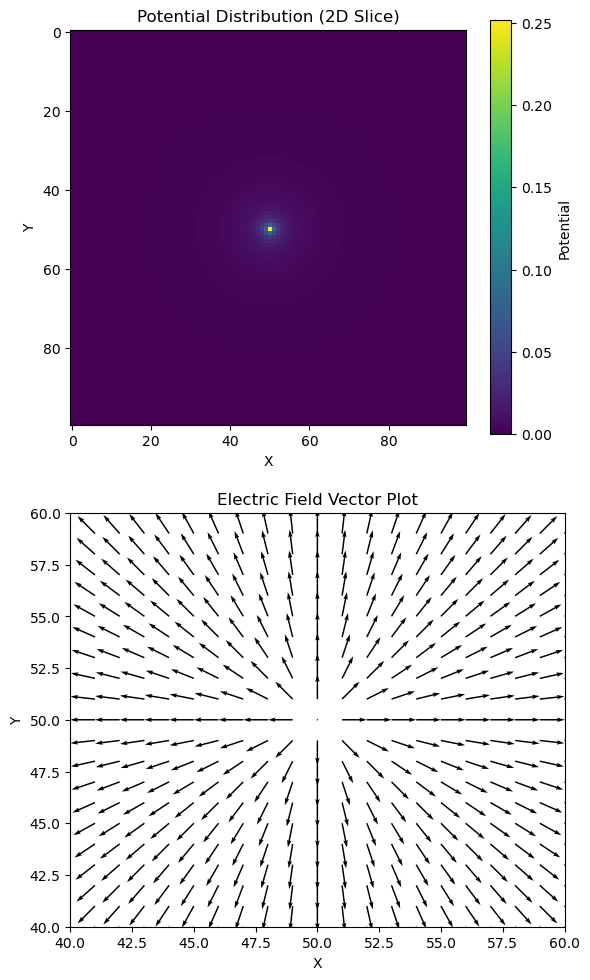

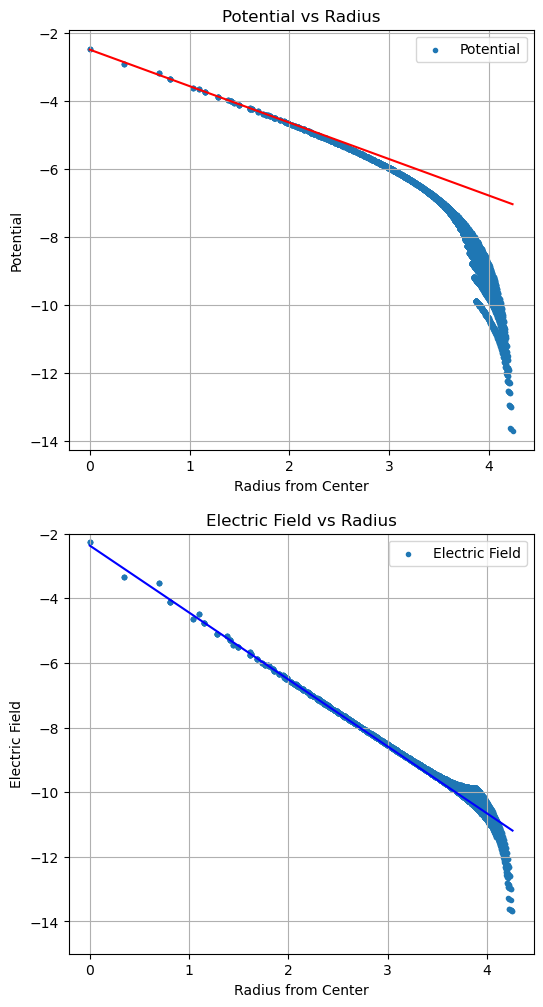

Potential vs Radius:
Gradient: -1.0712960725759737
Intercept: -2.493959132203505

Electric Field vs Radius:
Gradient: -2.0713482684411924
Intercept: -2.3672853754374157


In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cube_size=100

# Load data
section = np.loadtxt(f"section_slice_{cube_size}.txt")

# Plot 2D slice
plt.figure(figsize=(6, 10))  # Adjust figure size
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.imshow(section, cmap='viridis')
plt.title('Potential Distribution (2D Slice)')
plt.colorbar(label='Potential')
plt.xlabel('X')
plt.ylabel('Y')



# Compute gradient
grad = np.gradient(section)
Ex, Ey = -grad[1], -grad[0]

# Set center of the field
centre = section.shape[0] // 2
Ex[centre, centre] = Ey[centre, centre] = 0

# Compute electric field magnitude
E = np.sqrt(Ex**2 + Ey**2)
E[E == 0] = 1e-9  # Avoid division by zero

# Flatten arrays for plotting
y, x = np.indices(section.shape)
r = np.sqrt((x - centre)**2 + (y - centre)**2)



# Concatenate arrays
data = np.column_stack((x.flatten(), y.flatten(), section.flatten(), Ex.flatten(), Ey.flatten()))

# Save concatenated data to file
np.savetxt(f'all_data_{cube_size}.txt', data, fmt='%f', delimiter='    ', header='X    Y    Section    Ex/E    Ey/E')


# Plot electric field vector plot
plt.subplot(2, 1, 2)
plt.quiver(x, y, Ex / E, Ey / E, scale=20, width=0.003) #Note E normalisation
plt.xlim(cube_size/2-10, cube_size/2+10) #Zoom in
plt.ylim(cube_size/2-10, cube_size/2+10) #Zoom in
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Electric Field Vector Plot')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Obtain indices for sorted r
r_flat=r.flatten()
section_flat=section.flatten()
E_flat=E.flatten()
sorted_indices = np.argsort(r_flat)

# Sort r and section arrays using the sorted indices
sorted_r = r_flat[sorted_indices]
sorted_section = section_flat[sorted_indices]
sorted_E=E_flat[sorted_indices]



# Plot potential versus radius
plt.figure(figsize=(6,12))
plt.subplot(2, 1, 1)
# Avoid division by zero in plotting potential
indices=np.where((sorted_section>0)&(sorted_r>0))
plt.scatter(np.log(sorted_r[indices]), np.log((sorted_section[indices])), label='Potential' , marker=".")
plt.xlabel('Radius from Center')
plt.ylabel('Potential')
plt.title('Potential vs Radius')
plt.legend()
# Fit a line to the data using polyfit
coefficients_potential = np.polyfit(np.log(sorted_r[indices][:50]), np.log(sorted_section[indices][:50]), 1)
fit_line_potential = np.poly1d(coefficients_potential)
plt.plot(np.log(sorted_r[indices]), fit_line_potential(np.log(sorted_r[indices])), color='red')



# Plot electric field versus radius
plt.subplot(2, 1, 2)
# Avoid division by zero in plotting E
indices=np.where((sorted_E>0)&(sorted_r>0))
plt.scatter((np.log(sorted_r[indices])), np.log(sorted_E[indices]), label='Electric Field', marker=".")
plt.xlabel('Radius from Center')
plt.ylabel('Electric Field')
plt.ylim(-15,-2)
plt.title('Electric Field vs Radius')
plt.legend()
# Fit a line to the data using polyfit
coefficients_magnetic = np.polyfit(np.log(sorted_r[indices][:50]), np.log(sorted_E[indices][:50]), 1)
fit_line_magnetic = np.poly1d(coefficients_magnetic)
plt.plot(np.log(sorted_r[indices]), fit_line_magnetic(np.log(sorted_r[indices])), color='blue')

#Show plots
plt.show()


# Print the coefficients for Potential vs Radius
print("Potential vs Radius:")
print("Gradient:", coefficients_potential[0])
print("Intercept:", coefficients_potential[1])

# Print the coefficients for Electric Field vs Radius
print("\nElectric Field vs Radius:")
print("Gradient:", coefficients_magnetic[0])
print("Intercept:", coefficients_magnetic[1])



# Gauss-Seidel Loop

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


def Gauss_seidel(phi, rho, epsilon=1):
    error_threshold = 1e-3  # Set your desired error threshold
    error = 1 #Start error
    iterations = 0
    phi_new = phi.copy()  # Make a copy of phi to store the updated values
    

    while error > error_threshold:
        phi_old=np.copy(phi_new) #Keep phi old to compute errors
        
        #Guass Seidel Normal Loop
        for i in (range(cube_size)):
            for j in (range(cube_size)):
                for k in (range(cube_size)):
                    
                    phi_new[i,j,k]= (
                                    phi_new[(i+1)%cube_size,j,k]     + phi_new[i,(j+1)%cube_size,k]     + phi_new[i,j,(k+1)%cube_size]+
                                    phi_new[(i-1)%cube_size,j,k] + phi_new[i,(j-1)%cube_size,k] + phi_new[i,j,(k-1)%cube_size]+
                                    rho[i,j,k])/6
                    
                            
            # Define boundary values (Dirichlet boundary conditions)
        phi_new[0, :, :] = 0  # Example: set the potential at the lower boundary to 0
        phi_new[-1, :, :] = 0  # Example: set the potential at the upper boundary to 0
        phi_new[:, 0, :] = 0  # Example: set the potential at the left boundary to 0
        phi_new[:, -1, :] = 0  # Example: set the potential at the right boundary to 0
        
        #Magnetic Boundry Conditions are removed.
        
        phi_new[:, :, 0] = 0  # Example: set the potential at the front boundary to 0
        phi_new[:, :, -1] = 0  # Example: set the potential at the back boundary to 0

        # Calculate error
        error = np.sum(np.abs(phi_new - phi_old))
        
        if iterations % 100 == 0:
            print(iterations, error)
            
        iterations += 1
        
    return phi_new, iterations

    

# Create cube
cube_size = 50
rho = np.zeros((cube_size, cube_size, cube_size))
rho[cube_size//2, cube_size//2, cube_size//2] = 1 # Setting charge value to 1 at centre


# Define initial potential phi as zeros 
phi_initial = np.zeros_like(rho)

# Perform Jacobi iteration
phi_final, num_iterations = Gauss_seidel(phi_initial, rho)

# Plot a 2D slice of the charge distribution
slice_index = cube_size//2  # Index of the slice



0 0.3333333333333297


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


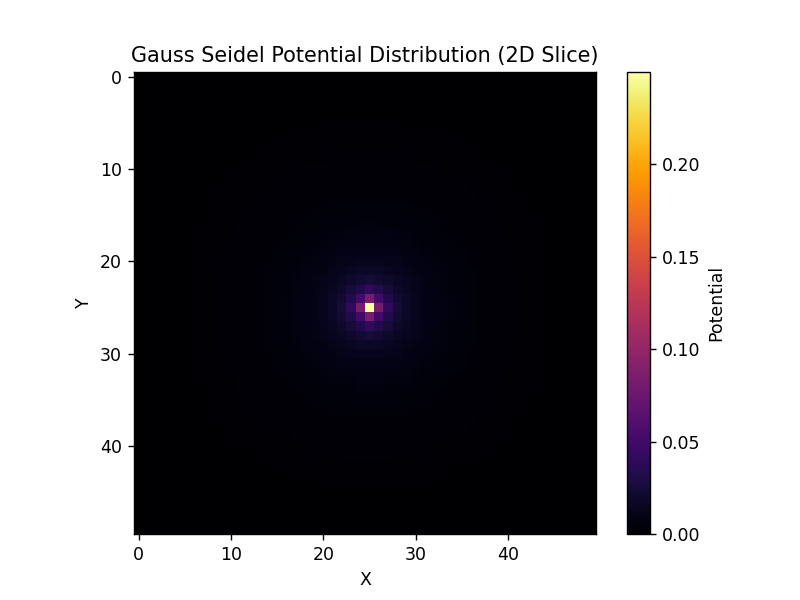

In [4]:
plt.imshow(phi_final[:, :, 25], cmap='inferno')
plt.title('Gauss Seidel Potential Distribution (2D Slice)')
plt.colorbar(label='Potential')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Magnetic Field

In [2]:
%matplotlib notebook

# Create a cube and charge distribution
cube_size = 100

rho = np.zeros((cube_size, cube_size, cube_size))  # Example charge distribution
rho[cube_size//2, cube_size//2, :] = 1 # Setting charge value to 1 for Z-axis


# Define initial potential phi as zeros
phi_initial = np.zeros_like(rho)

# Perform Jacobi iteration
phi_final, num_iterations = jacobi_iteration(phi_initial, rho)



slice_index = 50  # Index of the slice

#Save Results
np.savetxt(f'magnetic_section_slice_{cube_size}.txt',phi_final[:, :, slice_index])



0 16.666666666666668
1000 16.22045865088107
2000 13.183501649794612
3000 9.748927726495763
4000 7.030416788744442
5000 5.037141085108983
6000 3.6029059479873413
7000 2.575907158434156
8000 1.8414396592567641
9000 1.3163510569911372
10000 0.9409846801835854
11000 0.6726551778486223
12000 0.48084177755403656
13000 0.34372556752205463
14000 0.2457092269756773
15000 0.17564309830498967
16000 0.12555693689326142
17000 0.08975328119329601
18000 0.06415935019524828
19000 0.045863751860310546
20000 0.032785302972762116
21000 0.023436287861555005
22000 0.016753225955721516
23000 0.011975897445009454
24000 0.008560865829369596
25000 0.006119660266194747
26000 0.0043745857626382315
27000 0.003127134475499485
28000 0.002235404803328639
29000 0.0015979596255184378
30000 0.0011422875000035781


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Magnetic Field Plots

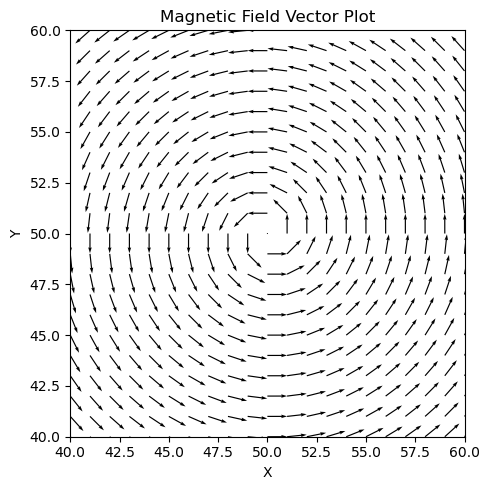

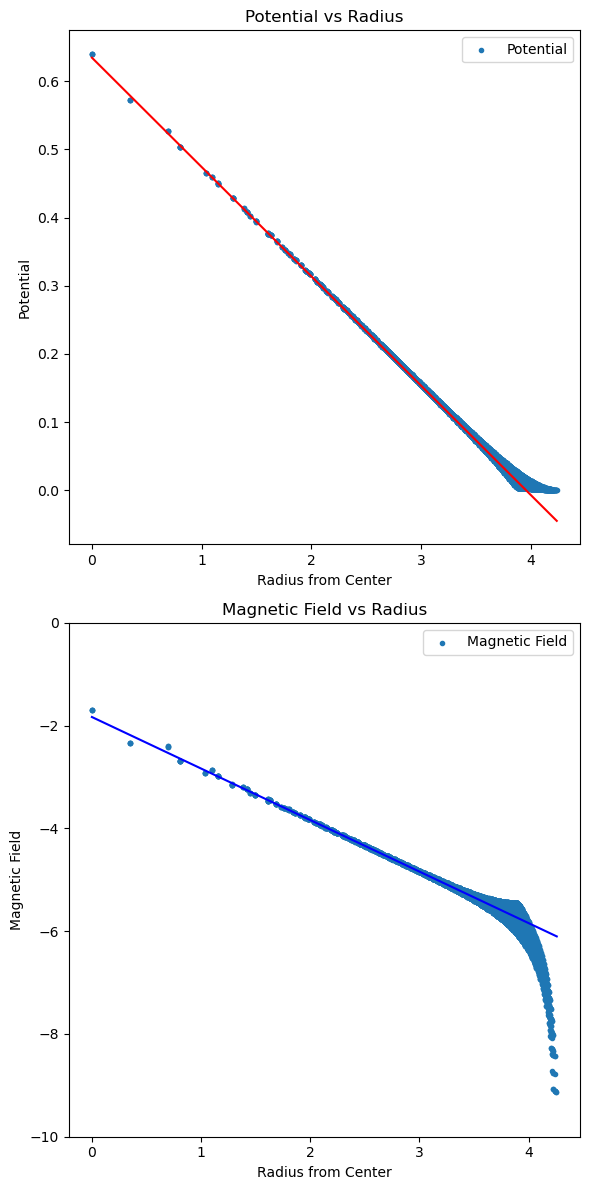

Potential vs Radius:
Gradient: -0.16029258909960048
Intercept: 0.6345983670460221

Magnetic Field vs Radius:
Gradient: -1.0025066749470093
Intercept: -1.832612120869946


In [4]:
%matplotlib inline
cube_size=100
# Load data
section = np.loadtxt(f"magnetic_section_slice_{cube_size}.txt")

#Calc Grads
grad = np.gradient(section)
Bx= grad[0]
By =-grad[1]


# Compute electric field magnitude
B = np.sqrt(Bx**2 + By**2)
B[B == 0] = 1e-9  # Avoid division by zero

# Set center of the field
centre = section.shape[0] // 2
Bx[centre, centre] = By[centre, centre] = 0
y, x = np.indices(section.shape)
r = np.sqrt((x - centre)**2 + (y - centre)**2)


# Concatenate arrays
magnetic_data = np.column_stack((x.flatten(), y.flatten(), section.flatten(), Bx.flatten(), By.flatten()))

# Save concatenated data to file with space delimiter
np.savetxt(f'magnetic_all_data_{cube_size}.txt', magnetic_data, fmt='%f', delimiter='    ', header='X    Y    Section    Bx    By')


#Create plots
plt.figure(figsize=(5,5))
plt.quiver(x, y, Bx / B, By / B, scale=20, width=0.003)
plt.xlim(cube_size/2-10, cube_size/2+10)
plt.ylim(cube_size/2-10, cube_size/2+10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Magnetic Field Vector Plot')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Obtain indices for sorted r
r_flat=r.flatten()
section_flat=section.flatten()
B_flat=B.flatten()
sorted_indices = np.argsort(r_flat)

# Sort r and section arrays using the sorted indices
sorted_r = r_flat[sorted_indices]
sorted_section = section_flat[sorted_indices]
sorted_B=B_flat[sorted_indices]


# Plot potential versus radius
plt.figure(figsize=(6,12))

# Scatter plot for Potential vs Radius
plt.subplot(2, 1, 1)
# Avoid division by zero in plotting potential
indices = np.where((sorted_section > 0) & (sorted_r > 0))
plt.scatter(np.log(sorted_r[indices]), sorted_section[indices], label='Potential', marker=".")
plt.xlabel('Radius from Center')
plt.ylabel('Potential')
plt.title('Potential vs Radius')
plt.legend()

# Fit a line to the data using polyfit
coefficients_potential = np.polyfit(np.log(sorted_r[indices][:100]), sorted_section[indices][:100], 1)
fit_line_potential = np.poly1d(coefficients_potential)
plt.plot(np.log(sorted_r[indices]), fit_line_potential(np.log(sorted_r[indices])), color='red')

# Scatter plot for Magnetic Field vs Radius
plt.subplot(2, 1, 2)
# Avoid division by zero in plotting E
indices = np.where((sorted_B > 0) & (sorted_r > 0))
plt.scatter(np.log(sorted_r[indices]), np.log(sorted_B[indices]), label='Magnetic Field', marker=".")
plt.xlabel('Radius from Center')
plt.ylabel('Magnetic Field')
plt.title('Magnetic Field vs Radius')
plt.ylim(-10,0)
plt.legend()

# Fit a line to the data using polyfit
coefficients_magnetic = np.polyfit(np.log(sorted_r[indices][:500]), np.log(sorted_B[indices][:500]), 1)
fit_line_magnetic = np.poly1d(coefficients_magnetic)
plt.plot(np.log(sorted_r[indices]), fit_line_magnetic(np.log(sorted_r[indices])), color='blue')

#Plot
plt.tight_layout()
plt.show()

# Print the coefficients for Potential vs Radius
print("Potential vs Radius:")
print("Gradient:", coefficients_potential[0])
print("Intercept:", coefficients_potential[1])

# Print the coefficients for Magnetic Field vs Radius
print("\nMagnetic Field vs Radius:")
print("Gradient:", coefficients_magnetic[0])
print("Intercept:", coefficients_magnetic[1])



# Successive Overrelaxation

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def over_relaxtion(phi, rho, epsilon=1):
    error_threshold = 1e-3  # Set desired error threshold
    error = 1
    iterations = 0
    
    phi_gauss = np.zeros_like(rho)  # Make a copy of phi to store the updated values
    phi_new   =  np.zeros_like(rho)
    
    while error > error_threshold:
        
        # Update phi to keep track of errors
        phi_old = phi_gauss.copy()
        
        #Gauss siedel loop
        for i in (range(cube_size)):
            for j in (range(cube_size)):
                                    
                    
                    phi_gauss[i,j]= omega * ((
                                    phi_gauss[(i+1)%cube_size,j] + phi_gauss[i,(j+1)%cube_size] + 
                                    phi_gauss[(i-1)%cube_size,j] + phi_gauss[i,(j-1)%cube_size]+
                                    rho[i,j])/4) + (1-omega)*phi_gauss[i,j]      
                    
        
            # Define boundary values (Dirichlet boundary conditions)
        phi_gauss[0, :] = 0  # Example: set the potential at the lower boundary to 0
        phi_gauss[-1, :] = 0  # Example: set the potential at the upper boundary to 0
        phi_gauss[:, 0] = 0  # Example: set the potential at the left boundary to 0
        phi_gauss[:, -1] = 0  # Example: set the potential at the right boundary to 0

        
        # Calculate error
        error = np.sum(np.abs(phi_gauss - phi_old))
        
  
        iterations += 1
        if iterations== 5000:
            break
            print(omega, iterations, error)
            
    #Print and save data
    print(omega, iterations, error)
    data.append([omega, iterations, error])
    return phi_new, iterations, omega

    
data=[]
# Create a  cube and charge distribution
cube_size = 100
rho = np.zeros((cube_size, cube_size))  # Example charge distribution
# Add a point charge at the center
rho[cube_size//2, cube_size//2] = 1 # Setting charge value to 1


# Define initial potential phi as zeros 
phi_initial = np.zeros_like(rho)
phi_gauss = np.zeros_like(rho)


#Iterate over various omega
omega=np.linspace(1,2,101)
for omega in tqdm(omega):
    phi_final, num_iterations, omega = over_relaxtion(phi_initial, rho, omega)

#Save Results
np.savetxt(f'overelaxation_{cube_size}.txt',data)


  0%|                                                                                          | 0/101 [00:00<?, ?it/s]


KeyboardInterrupt: 

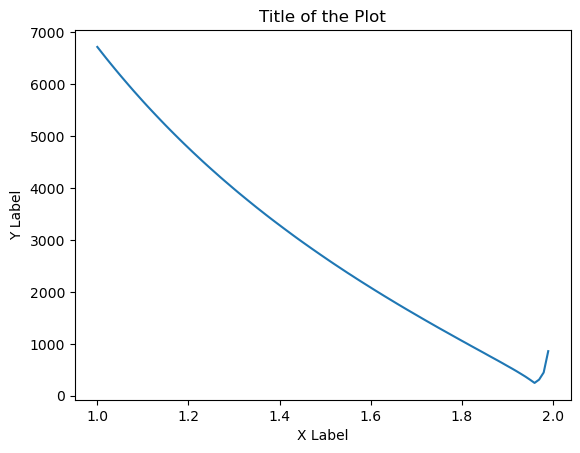

Minima: 1.96


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the file
data = np.loadtxt('overelaxation_100.txt')

# Extract the first two columns
x = data[:, 0]  # First column
y = data[:, 1]  # Second column

# Plot the data
plt.plot(x, y)
plt.xlabel('X Label')  # Provide appropriate label for x-axis
plt.ylabel('Y Label')  # Provide appropriate label for y-axis
plt.title('Title of the Plot')  # Provide a title for the plot
plt.show()

#Print minima
print(f"Minima: {x[np.argmin(y)]}")